https://www.kaggle.com/code/gopimali/intel-image-classification-96-accur/notebook

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading Images

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=25,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2, 
                              horizontal_flip=True,
                              fill_mode='nearest')

In [4]:
path  = r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Intel_Image_Classification\Intel_Images\seg_pred\seg_pred\144.jpg"

In [5]:
import cv2

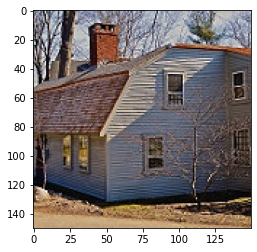

In [6]:
def display(path):
    plt.figure(figsize=(4,4))
    read = cv2.imread(path)
    read_cvt = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
    plt.imshow(read_cvt)
    plt.show()
    
display(path)

In [7]:
image_gen.flow_from_directory(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Intel_Image_Classification\Intel_Images\seg_train\seg_train")

Found 14034 images belonging to 6 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [10]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='acc')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 128)      512       
 hNormalization)                                                 
                                                        

In [12]:
training_image = image_gen.flow_from_directory(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Intel_Image_Classification\Intel_Images\seg_train\seg_train",
                                              target_size=(150, 150), batch_size=25)

Found 14034 images belonging to 6 classes.


In [13]:
testing_image  = image_gen.flow_from_directory(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Intel_Image_Classification\Intel_Images\seg_test\seg_test",
                                              target_size=(150, 150), batch_size=25)

Found 3000 images belonging to 6 classes.


In [14]:
steps_per_epoch = 14034//32
validation_steps =14034//32

history = model.fit_generator(generator=training_image,
                              steps_per_epoch=steps_per_epoch,
                              epochs=100,
                              validation_data=testing_image,
                              validation_steps=validation_steps)

Epoch 1/100
 80/438 [====>.........................] - ETA: 1:11 - loss: 1.9507 - acc: 0.4275

KeyboardInterrupt: 

In [22]:
import keras.utils as image
from PIL import Image

In [26]:
def processing(path):
    img = cv2.imread(path)
    test1_proc = image.load_img(path, target_size=(150, 150))
    test1_proc_1 = image.img_to_array(test1_proc)
    t1 = np.expand_dims(test1_proc, axis=0)
    t1 = t1/255
    pred_classes = model.predict(t1)
    pred = np.argmax(pred_classes, axis=1)
    
    plt.subplot(121)
    pic = Image.open(path)
    plt.xlabel("Original Image")
    plt.imshow(pic)
    
    plt.subplot(122)
    s1 = pd.Series(pred_classes.ravel(), index=training_image.class_indices.keys())
    s1.plot(kind='bar', figsize=(10,5))
    plt.xlabel('Prediciton')
    plt.show()
    
    for i in training_image.class_indices:
        if pred == training_image.class_indices[i]:
            print('Prediction made by model is :', i)

1/1 [==============================] - 0s 19ms/step


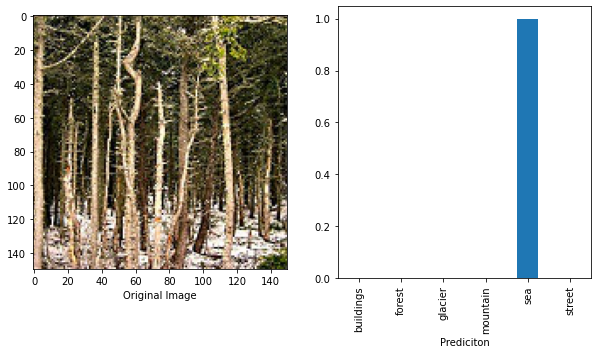

Prediction made by model is : sea


In [27]:
processing(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Intel_Image_Classification\Intel_Images\seg_test\seg_test\forest\20306.jpg")

1/1 [==============================] - 0s 20ms/step


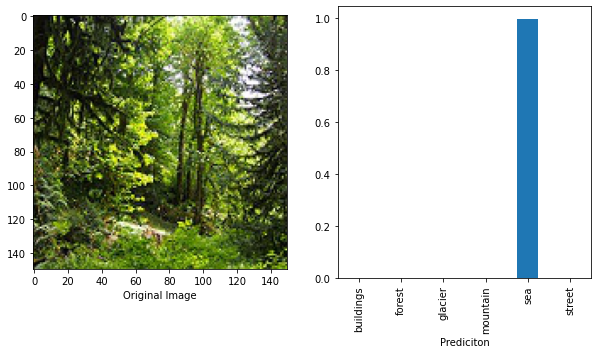

Prediction made by model is : sea


In [29]:
processing(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Intel_Image_Classification\Intel_Images\seg_test\seg_test\forest\20322.jpg")

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], lco='upper left')
plt.show()

NameError: name 'history' is not defined

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/2
438/438 [==============================] - 81s 182ms/step - loss: 1.4095 - acc: 0.5294 - val_loss: 1.8201 - val_acc: 0.3920
Epoch 2/2
438/438 [==============================] - 66s 152ms/step - loss: 0.9473 - acc: 0.6507


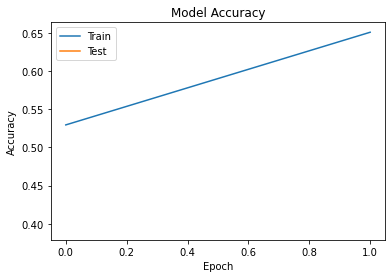

TypeError: __init__() got an unexpected keyword argument 'lco'

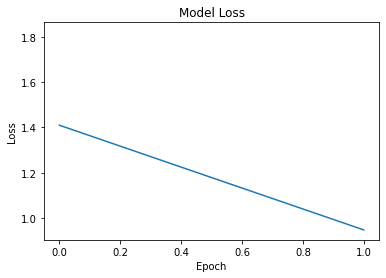

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from PIL import Image
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

image_gen = ImageDataGenerator(rotation_range=25,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2, 
                              horizontal_flip=True,
                              fill_mode='nearest')

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='acc')


training_image = image_gen.flow_from_directory(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Intel_Image_Classification\Intel_Images\seg_train\seg_train",
                                              target_size=(150, 150), batch_size=25)
testing_image  = image_gen.flow_from_directory(r"C:\Users\emage\OneDrive\Muqesh.py\Tensorflow (Kaggle)\Intel_Image_Classification\Intel_Images\seg_test\seg_test",
                                              target_size=(150, 150), batch_size=25)



steps_per_epoch = 14034//32
validation_steps =14034//32

history = model.fit_generator(generator=training_image,
                              steps_per_epoch=steps_per_epoch,
                              epochs=2,
                              validation_data=testing_image,
                              validation_steps=validation_steps)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], lco='upper left')
plt.show()